In [1]:
import pandas as pd

df = pd.read_csv('C:/Users/png4/Desktop/AI/Assignments/practical_application_II_starter2/data/bank-additional-full.csv', sep=';')
print(df.info())
print(df.isnull().sum())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

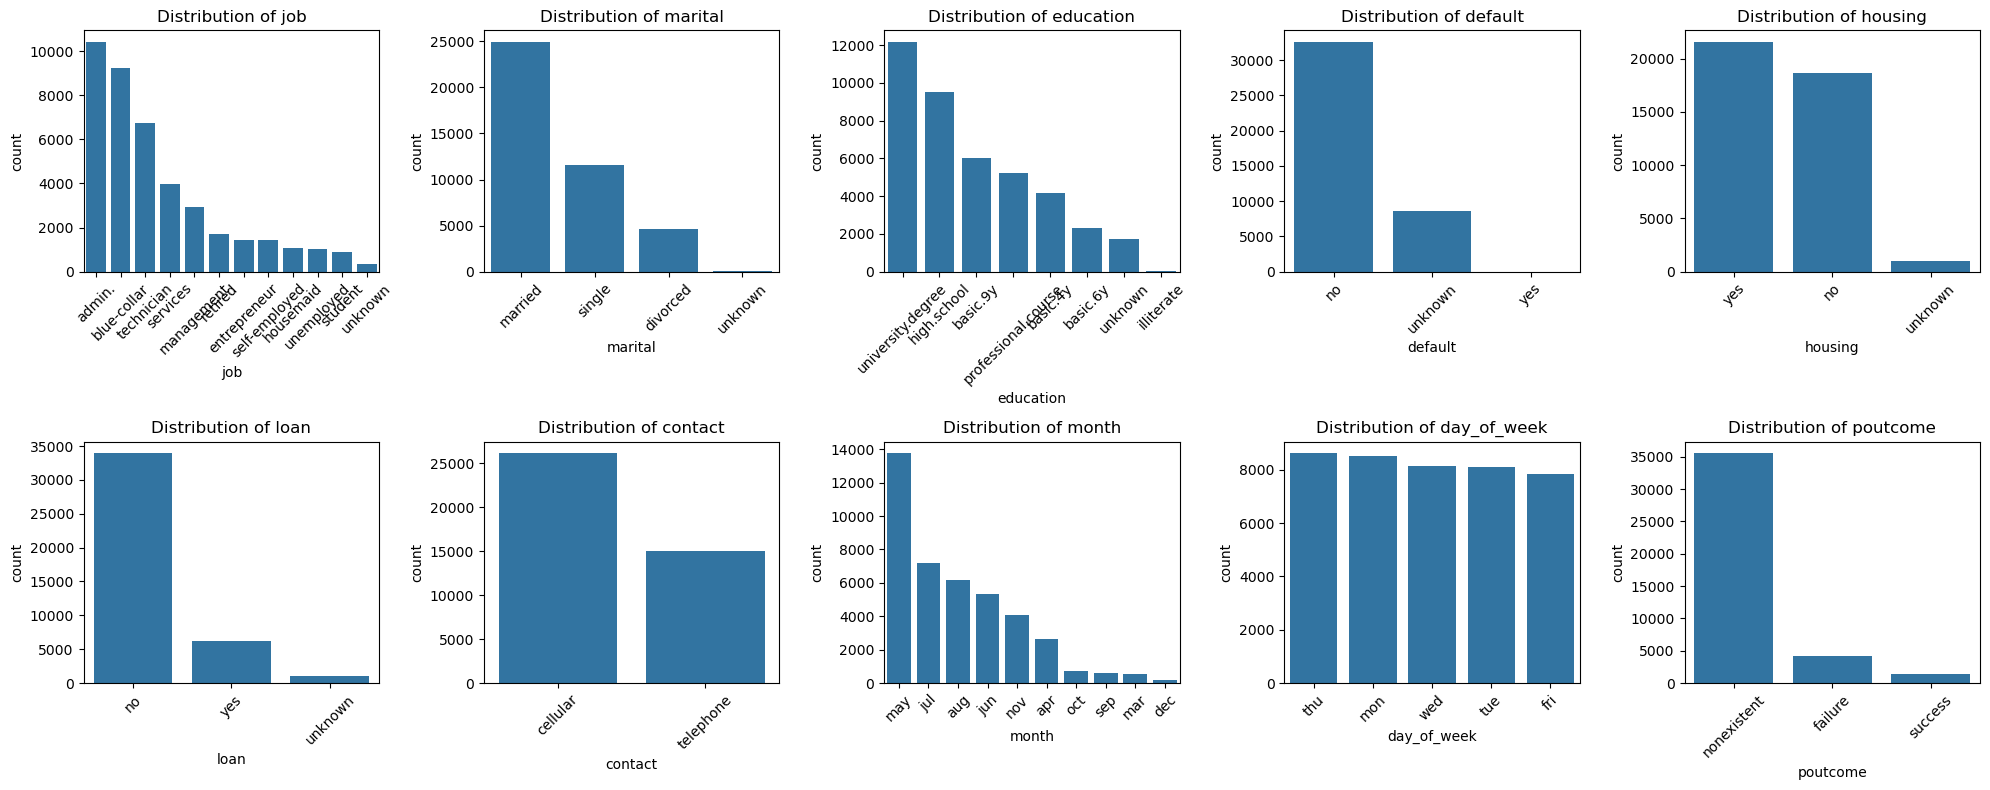

In [3]:
# Visualize
import matplotlib.pyplot as plt
import seaborn as sns

categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
for ax, col in zip(axes.flatten(), categorical):
    sns.countplot(data=df, x=col, ax=ax, order=df[col].value_counts().index)
    ax.set_title(f'Distribution of {col}')
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

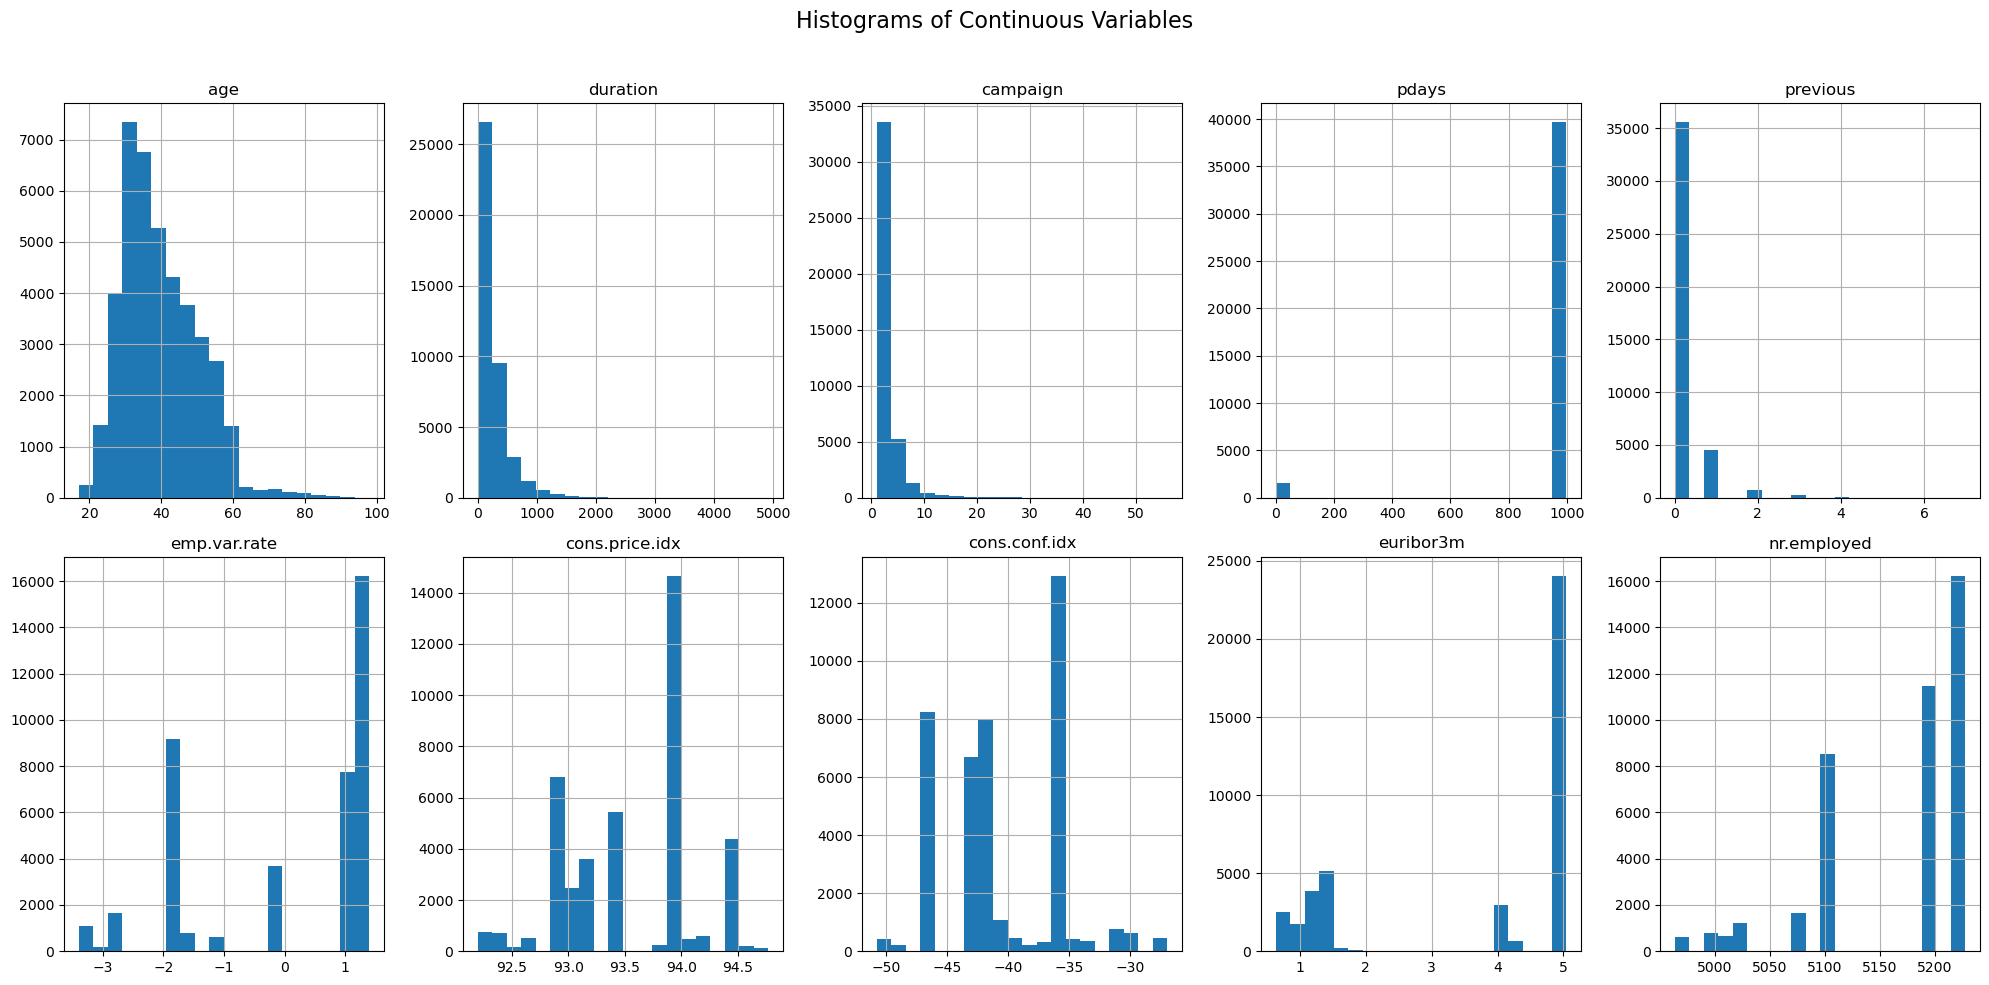

In [4]:
# Continous Variables
continuous = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
df[continuous].hist(bins=20, figsize=(20, 10), layout=(2, 5))
plt.suptitle('Histograms of Continuous Variables', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [5]:
# Feature Engineering & Encoding
df = df.drop(columns=['duration'])
df['y'] = df['y'].map({'no': 0, 'yes': 1})

X = pd.get_dummies(df.drop('y', axis=1), drop_first=True)
y = df['y']

In [6]:
# Train/Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
# Baseline Model
baseline = y_train.value_counts(normalize=True)[0]
print(f'Baseline accuracy (majority class): {baseline:.3f}')

Baseline accuracy (majority class): 0.887


In [9]:
# Logistic Regression Model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(max_iter=2000, random_state=42)
start = time.time()
lr.fit(X_train_scaled, y_train)
train_time = time.time() - start

y_pred_train = lr.predict(X_train_scaled)
y_pred_test = lr.predict(X_test_scaled)

results = {
    'Model': 'Logistic Regression',
    'Train Time': train_time,
    'Train Accuracy': accuracy_score(y_train, y_pred_train),
    'Test Accuracy': accuracy_score(y_test, y_pred_test),
    'Precision': precision_score(y_test, y_pred_test),
    'Recall': recall_score(y_test, y_pred_test),
    'F1-score': f1_score(y_test, y_pred_test)
}
print(results)

{'Model': 'Logistic Regression', 'Train Time': 0.1126408576965332, 'Train Accuracy': 0.8998482549317147, 'Test Accuracy': 0.9011896091284293, 'Precision': 0.69, 'Recall': 0.22306034482758622, 'F1-score': 0.33713355048859933}


In [13]:
# Model Comparision
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time
import pandas as pd

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Logistic Regression': LogisticRegression(max_iter=2000, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Linear SVM': LinearSVC(max_iter=2000, random_state=42)
}

results_list = []

for name, model in models.items():
    start = time.time()
    if name == 'Decision Tree':
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred_train = model.predict(X_train_scaled)
        y_pred_test = model.predict(X_test_scaled)
    train_time = time.time() - start
    results_list.append({
        'Model': name,
        'Train Time': train_time,
        'Train Accuracy': accuracy_score(y_train, y_pred_train),
        'Test Accuracy': accuracy_score(y_test, y_pred_test),
        'Precision': precision_score(y_test, y_pred_test),
        'Recall': recall_score(y_test, y_pred_test),
        'F1-score': f1_score(y_test, y_pred_test)
    })

results_df = pd.DataFrame(results_list)
print(results_df)

                 Model  Train Time  Train Accuracy  Test Accuracy  Precision  \
0  Logistic Regression    0.205743        0.899848       0.901190   0.690000   
1                  KNN    6.594731        0.911624       0.895606   0.575221   
2        Decision Tree    0.398891        0.995417       0.840252   0.307540   
3           Linear SVM    1.053564        0.900000       0.901432   0.716418   

     Recall  F1-score  
0  0.223060  0.337134  
1  0.280172  0.376812  
2  0.334052  0.320248  
3  0.206897  0.321070  


In [16]:
# Interpretation
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr.coef_[0]})
print(coef_df.sort_values('Coefficient', ascending=False).head(10))

                 Feature  Coefficient
5         cons.price.idx     1.217868
8            nr.employed     0.517871
7              euribor3m     0.353142
37             month_aug     0.176741
41             month_mar     0.170996
50  poutcome_nonexistent     0.135059
6          cons.conf.idx     0.130700
51      poutcome_success     0.123489
21        marital_single     0.063402
13           job_retired     0.062978


In [17]:
# Model Improvement
from sklearn.model_selection import GridSearchCV

# Example for Decision Tree
param_grid = {'max_depth': [3, 5, 7, 10, None], 'min_samples_split': [2, 5, 10]}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)
print('Best params:', grid.best_params_)
print('Best F1:', grid.best_score_)

Best params: {'max_depth': 10, 'min_samples_split': 2}
Best F1: 0.36529254213292106


In [26]:
# Summary - Note: I added precision, recall and f1 scores based on the recording of our Teacher Assistant on Friday May 30

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
import time
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Use a smaller subset for quick testing
X_train_small = X_train_scaled[:5000]
y_train_small = y_train[:5000]
X_test_small = X_test_scaled[:1000]
y_test_small = y_test[:1000]

lr = LogisticRegression(max_iter=2000, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
decision_tree = DecisionTreeClassifier(random_state=42)
svm = LinearSVC(max_iter=2000, random_state=42)

models = [
    ('Logistic Regression', lr),
    ('KNN', knn),
    ('Decision Tree', decision_tree),
    ('Linear SVM', svm)
]

results_list = []

for name, model in models:
    if name == 'Decision Tree':
        X_tr, X_te = X_train_small, X_test_small
    else:
        X_tr, X_te = X_train_small, X_test_small

    start = time.time()
    model.fit(X_tr, y_train_small)
    train_time = time.time() - start

    y_pred_train = model.predict(X_tr)
    y_pred_test = model.predict(X_te)

    results_list.append({
        'Model': name,
        'Train Time': train_time,
        'Train Accuracy': accuracy_score(y_train_small, y_pred_train),
        'Test Accuracy': accuracy_score(y_test_small, y_pred_test),
        'Precision': precision_score(y_test_small, y_pred_test),
        'Recall': recall_score(y_test_small, y_pred_test),
        'F1-score': f1_score(y_test_small, y_pred_test)
    })

results_df = pd.DataFrame(results_list)
print(results_df)

                 Model  Train Time  Train Accuracy  Test Accuracy  Precision  \
0  Logistic Regression    0.036833          0.9090          0.900   0.702128   
1                  KNN    0.002044          0.9222          0.887   0.553571   
2        Decision Tree    0.048729          0.9998          0.845   0.347458   
3           Linear SVM    0.098799          0.9082          0.900   0.711111   

     Recall  F1-score  
0  0.277311  0.397590  
1  0.260504  0.354286  
2  0.344538  0.345992  
3  0.268908  0.390244  
